# CMSC478 Machine Learning

# Assignment-4: Classification and Regression with Neural Networks

*Type your name and ID here* 

## Overview and Learning Objectives

You have learned the fundamentals of Neural Networks and Deep Learning. You have also learned how to train them based on the techniques discussed in lectures and the contents from Chapter 10 and Chapter 11 of the textbook.

In Part I of this assignment, you are going to build a NN for classification. In Part II, you will build a NN for regression.

Pedagogically, this assignment will help you:
- better understand Neural Networks.

- practice with Tensorflow and Keras API.

- practice the skills you learned in sklearn and combine them with tf/keras to use in your project.

Notice that you should have Tensorflow version 2.0 installed and ready.

## Part I - Classification with NNs

In Part I, you are going to use neural networks for a binary classification probelm to predict heart disease. You can [download the data from here](https://github.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/blob/master/Assignment-4/SAheart.csv).<br> <b>Note:</b>The data should be stored in the same working directory as your notebook.

In [1]:
# Import necessary Python and Tensorflow/keras modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.0.0
Eager Execution mode:  True


In [3]:
# load data
heart_data = pd.read_csv('SAheart.csv')
print(heart_data.shape)
heart_data.head()

(462, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Some description about the features from [the data source](https://web.stanford.edu/~hastie/ElemStatLearn/):

> "A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal." 

        sbp	        systolic blood pressure
        tobacco		cumulative tobacco (kg)
        ldl		    low densiity lipoprotein cholesterol
        adiposity
        famhist		family history of heart disease (Present, Absent)
        typea		  type-A behavior
        obesity
        alcohol		current alcohol consumption
        age		    age at onset
        chd		    label, coronary heart disease

## <font color="red"> Required Coding

In [4]:
### START CODING HERE ###
# The first column, row.names is useless, drop it! ~ 1 line
None
### END CODING HERE ###

print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
# Get the feature data types.
heart_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

> You need to convert `famhist` from categorical (Present/Absent) to numerical {1,0} for further processing in classifier.

## <font color="red"> Required Coding

In [6]:
### START CODING HERE ### 
# Convert 'famhist' to pd.Categorical and then use .cat.codes to convert the values to [1,0] ~2 lines
# Hint: There might be other ways to do this using pandas dataframe methods.
# Make sure your output looks exactly like the dataframe head below, i.e. famhist values are converted to {1,0}.
None
None
### END CODING HERE ###

print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [7]:
type(heart_data['famhist'][0])

numpy.int8

## <font color="red"> Required Coding

In [8]:
# Create X, y - Notice that X should contain all the features (columns) except 'chd'
# y should include only 'chd' because it's the label!
### START CODING HERE ### ~2 lines
X = None
y = None
### END CODING HERE ###

print(X.shape)
print(y.shape)

(462, 9)
(462,)


In [9]:
# Split the data to train and test using train_test_split method with test_size=0.2 and random_state=42
### START CODING HERE ###
X_train, X_test, y_train, y_test = None
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(369, 9)
(369,)
(93, 9)
(93,)


> There are different ways to load the data into tf tensors depeneding on your data type (image, text, etc). The following cell is one way of loading pandas dataframes to tensorflow tensors so that you can use tf/keras methods on them.

In [10]:
# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [11]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [12]:
for feat, targ in train_tensor.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [166.     0.8    5.63  36.21   0.    50.    34.72  28.8   60.  ], Target: 0
Features: [118.     0.12   1.96  20.31   0.    37.    20.01   2.42  18.  ], Target: 0
Features: [126.     5.1    2.96  26.5    0.    55.    25.52  12.34  38.  ], Target: 1
Features: [148.     0.     4.66  24.39   0.    50.    25.26   4.03  27.  ], Target: 0
Features: [122.     4.     5.24  27.89   1.    45.    26.52   0.    61.  ], Target: 1


> As discussed in the lectures, data is fed into the network in batches (mini-batches).

In [13]:
# Batch train and test data
train_batch = train_tensor.shuffle(len(X_train)).batch(1)
test_batch = test_tensor.shuffle(len(X_test)).batch(1)

print(type(train_batch))
print(type(test_batch))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


Now, build the model based on the given architecture specifications.

## <font color="red"> Required Coding

In [14]:
### START CODING HERE ###
# Build a Sequential neural network - a classifier model
nn_clf = tf.keras.Sequential([
    # Create a dense layer with 20 units, input_dim=9, and 'relu' activation function ~ 1 line
    None,
    # Create a dense layer with 12 units, and 'relu' activation function ~ 1 line
    None,
    # Create a dense layer with ? unit(s), and '?' activation function ~ 1 line
    # YOU should decide on the number of untis and the activation function for this last layer (output layer)
    # Hint: What type of ML task is this problem?
    None
    ])  
### END CODING HERE ###

In [15]:
### START CODING HERE ###
# Compile the model by 'adam' optimizer, 'binary_crossentropy' loss and 'accuracy' as metrics ~ 1 line
None
### END CODING HERE ###

In [1]:
### START CODING HERE ###
# Fit nn_clf model on train_batch with 150 epochs
nn_clf_history = None
### END CODING HERE ###

> `history` now contains values for `loss` and `accuracy` during training, let's plot them.

(0, 1)

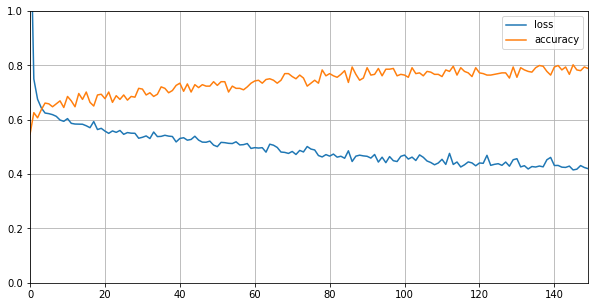

In [17]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

## <font color="red"> Required Coding

In [2]:
### START CODING HERE ###
# evaluate nn_clf model on test_batch using .evaluate method
None
### END CODING HERE ###

In [19]:
nn_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


> Now, let's plot ROC curve for this neural network model. Recall from Assignment-3 that you need to get class probabilities, fpr and tpr. To get class probabilities, keras has `predict()` method. Notice that it's applied on `X_test` not `test_batch`. Alternatively, you can use `predict_proba()` method, similar to sklearn, which would generate identical results.

In [20]:
# Get class probabilities for nn - ignore the warning
nn_preds = nn_clf.predict(X_test).ravel()

In [5]:
# See class probabilities predicted by nn classifier
nn_preds[:5]

## <font color="red"> Required Coding

In [3]:
### START CODING HERE ### 
# Plot ROC curve for nn_clf - Write as many lines of code as needed

# Hint: check back your Assignment-3 code, you need to calculate tpr, fpr, thresholds
# Plot should have all the elements that Assignment-3 ROC curves had, title, xlabel and ylabel, xlim & ylim
# Plot should also have AUC_NN (roc_auc) shown on lower right

### END CODING HERE ###

## Part I - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b><br>

Q1 - If this problem was a multi-class classification, what activation function would you use for the output layer neurons? How many neurons would be required for the output layer? What other hyperparameters of nn can you change? Name at least 3 other hyperparameters. GIVE COMPLETE ANSWER!

Q2 - Change the batch number from 1 to 5. Would it improve or hurt the results? Make an argument with reasoning on your observation.

## Part II - Regression with NNs

In this part, you will create a neural network to do a regression task.

[Download the data from here](https://github.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/blob/master/Assignment-4/auto.csv). This is cars dataset. You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg). The goal is predicting MPG based on other features.

In [24]:
auto_data = pd.read_csv('auto.csv')
print(auto_data.shape)
auto_data.head()

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [25]:
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## <font color="red"> Required Coding

In [26]:
### START CODING HERE ### 
# Drop all na's using dataframe .dropna(inplace=True) method ~ 1 line
None
### END CODING HERE ###
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

For some datasets like this, a technique in data preprocessing is used to encode categorical features to encoded dummy variables. Here, we convert <b>Origin</b> (which looks numeric but is actually categorical) using pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method. This technique is one example of One Hot Encoding of categorical features.

In [27]:
auto_data['Origin'] = auto_data['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))
auto_data = pd.get_dummies(auto_data, prefix='', prefix_sep='')
print(auto_data.shape)
auto_data.head()

(392, 10)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## <font color="red"> Required Coding

In [28]:
### START CODING HERE ### 
# Create X and y, X should not contain MPG column and y should only contain MPG column
# Hint: You can use dataframe .pop() method, but you may need to create a deep copy of the dataframe first
# There are usually multiple ways of doing these operations in pnadas dataframes
X = None
y = None
### END CODING HERE ###
print(X.shape)
print(y.shape)
X.head()

(392, 9)
(392,)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1


> <b>Note:</b> auto_data should remain the same and should still include MPG

In [29]:
auto_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


>Normalization is a good pratice when you work with values with different ranges.

In [30]:
# Normalize X 
X = (X - X.mean())/X.std()
print(X.shape)
X.head()

(392, 9)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.457538,-0.501749,0.773608
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.457538,-0.501749,0.773608
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.457538,-0.501749,0.773608


## <font color="red"> Required Coding

In [31]:
### START CODING HERE ###
# Split the data to train and test using train_test_split method with test_size=0.2 and random_state=42
None
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(313, 9)
(313,)
(79, 9)
(79,)


In [32]:
### START CODING HERE ### 
# Build a neural network for regression
nn_reg1 = tf.keras.Sequential([
    # Create a dense layer with 64 neurons, 'relu' activation function and input_shape=[len(X_train.keys())]
    None,
    # Create a dense layer with 64 neurons and 'relu' activation function
    None,
    # Create a dense layer with ? neuron(s) and ? activation
    # YOU should decide how many neuron(s) is/are needed and what activation function (if any) to use for output
    # Hint: What type of ML task is this problem?
    None
    ])
### END CODING HERE ###

In [33]:
# This is another way of defining the optimizer, you can pass learning_rate and other hyperparameters to it.
optimizer = tf.keras.optimizers.RMSprop(0.001)

### START CODING HERE ### 
# Compile nn_reg1 with 'mse' loss, optimizer=optimizer, metrics=['mae', 'mse']
None
### END CODING HERE ###

In [34]:
nn_reg1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## <font color="red"> Required Coding

In [4]:
EPOCHS = 1000

### START CODING HERE ### 
# fit nn_reg1 on X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1
nn_reg1_history = None
### END CODING HERE ###

In [36]:
# Your numbers might be a little different!
hist1 = pd.DataFrame(nn_reg1_history.history)
hist1['epoch'] = nn_reg1_history.epoch
hist1.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.812366,1.110980,2.812366,7.655175,1.956147,7.655175,995
996,2.685262,1.059344,2.685262,7.460482,1.945784,7.460482,996
997,2.883002,1.079991,2.883003,7.763593,1.922872,7.763592,997
998,2.739790,1.096586,2.739789,9.350677,2.080532,9.350677,998
999,2.809637,1.054026,2.809637,7.439113,2.016371,7.439113,999


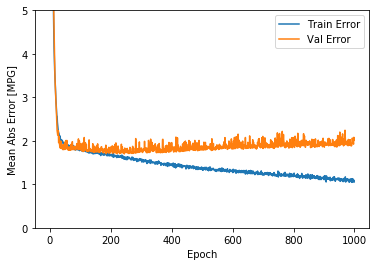

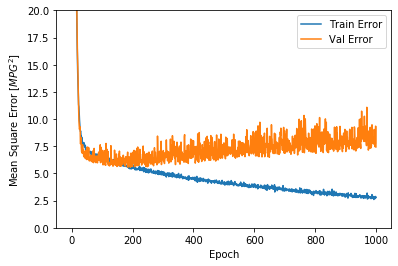

In [37]:
# Your plots might be slightly different but should look very similar!
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(nn_reg1_history)

> Based on the above plots, it looks like that there is not too much improvement after around 100 epochs. Let's rebuild the model and update `nn_reg2.fit` call to automatically stop training when the validation loss doesn't improve. As discussed in the lectures, you can use an `EarlyStopping` callback that checks a training condition for every epoch. If a preset number of epochs elapses without much improvement, it automatically stops the training.

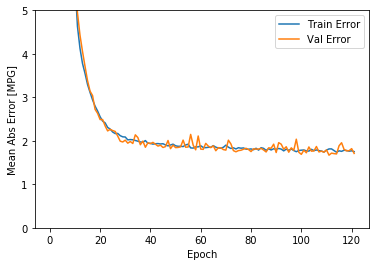

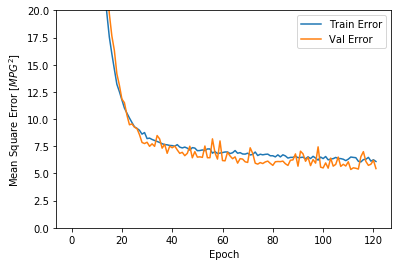

In [38]:
### START CODING HERE ### 
# Build another regression neural network with the same architecture and compile it with the same hyperparameters
nn_reg2 = tf.keras.Sequential([
    None,
    None,
    None
    ])

optimizer = None

# Compile the model using the same hyperparameters as nn_reg1
None

# Create a tf.keras.callbacks with EarlyStopping method and monitor='val_loss' and patience=10 parameters ~ 1 line
# Hint: The patience parameter is the number of epochs to check for improvement
# You may want to look up textbook examples to remind yourself how to do this!
early_stop = None

# Fit nn_reg2 on X_train, y_train, epochs=EPOCHS, valisation_split=0.2, verbose=0, callbacks=[early_stop]
nn_reg2_history = None
### END CODING HERE ###

plot_history(nn_reg2_history) # Ignore the warning.
#Your plots might be slightly different but should look very similar.

In [39]:
### START CODING HERE ### 
# Evaluate nn_reg2 using .evaluate() method on X_test, y_test and verbose=2
loss, mae, mse = None
### END CODING HERE ###

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

79/79 - 0s - loss: 5.8982 - mae: 1.7430 - mse: 5.8982
Testing set Mean Abs Error:  1.74 MPG


> You can check the quality of the model predictions by the following plots. Use these plots to answer Part II Q1.

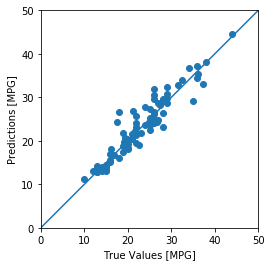

In [40]:
nn_reg2_preds = nn_reg2.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, nn_reg2_preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

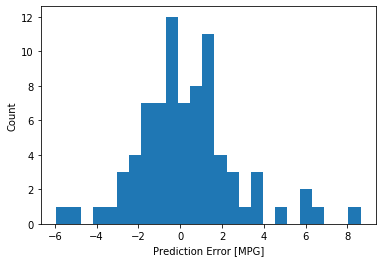

In [41]:
error = nn_reg2_preds - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

## Part II - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b>

Q1- How do you interprete the above plots and the model performance (Predictions vs True Values & the histogram of Prediction Error)? GIVE COMPLETE ANSWER!

Q2 - How do you interprete the first model's plots of mse and mae, i.e. `plot_history(nn_reg1_history)`? What is the impact of choosing `mse` vs `mae`? GIVE COMPLETE ANSWER!

Q3 - How do you interprete `plot_history(nn_reg1_history)`? What is the impact of using `EarlyStopping`? GIVE COMPLETE ANSWER!

## Optional Part III - <font color=green>Extra Credit</font>

<b>Notice:</b> This part is totally optional and for earning <b><font color=green>extra credit</font></b> in the "Assignment" section of your final grade. Attempt this part only if you have enough time and you're inclined to challenge yourself a bit!

[Download the video games dataset](https://raw.githubusercontent.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/master/Assignment-4/video.csv)<br> 

You can read about the data [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). <br>

Build a neural network that can predict the "<b>Rating</b>" of each game based on other features. Alternatively, you may predict either the global sales or regional sales (in North America, Europe, etc) for each row/video game. Perform any necessary preprocessing steps needed on the dataset. <br>

You should create a separate notebook for Extra Credit attempt and submit it via a separate link in Blackboard. If you can get good results based on the instructor's judgement of your work, you may earn up to 50 points of extra credit for A4 that can be used for the missing points of "Assignment" section of your final grade.<br>

<b>Note:</b> Extra credits for A4 can only be used to compensate for "Assignment" section NOT on any other sections of the final grade such as quizzes or exams.

In [42]:
video_data = pd.read_csv('video.csv')
print(video_data.shape)
video_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
video_data.dropna(inplace=True)

In [44]:
print(video_data.shape)
video_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


## Grading

For Assignment 4, your notebook will be run and graded with a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and answer ALL questions COMPLETELY. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I implementaion has 40 points:
- 10 points: preprocessing steps.
- 15 points: nn_clf implementation, and compile.
- 15 points: correct ROC curve for nn_clf.

Part I questions have 10 points (5 points each).

Part II implementaion has 35 points:
- 10 points: preprocessing steps.
- 10 points: nn_reg1 implementation, and compile.
- 15 points: nn_reg2 implementation, and compile (including EarlyStopping).

Part II questions have 15 points (5 points each).

Part III is optional and for Extra Credit only - up to 50 extra points based on the quality of your work.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical and spelling errors.

## How to Submit and Due Date

Name your notebook ```Lastname-A4.ipynb```. Submit the file using the ```Assignment-4``` link on Blackboard.

If you attempt the Extra Credit in Part III, create a separate notebook including all the necessary code, name it `Lastname-A4-EC.ipynb` and submit it using the ```A4-Extra-Credit``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday December 2nd 11:59PM.</b></font>